In [59]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [61]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [62]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [63]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [64]:
tf.keras.backend.clear_session()

In [65]:
subject = 'Pernambuco - Consumo de Cimento (t)'
start_index = 0
split_index = 155
window_size = 36
train_split = split_index + 1 - 12

In [66]:
data = pd.read_csv('2003_mo_model_input_PE.csv')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - Consumo de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,99.743,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,86.997,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,83.033,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,82.302,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,80.217,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


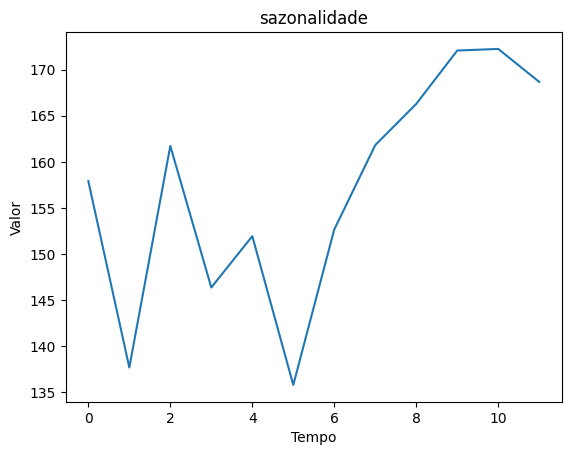

,sazonalidade
sazonalidade,
0,157.912809
1,137.690453
2,161.728038
3,146.370627
4,151.940127
5,135.800340
6,152.669227
7,161.820331
8,166.288297


In [67]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [68]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509,157.912809,99.743
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971,137.690453,86.997
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434,161.728038,83.033
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896,146.370627,82.302
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358,151.940127,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.940127,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.800340,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.669227,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.820331,NaN


In [69]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data

0       84.896
1       81.240
2      100.925
3       83.152
4       81.128
        ...   
244        NaN
245        NaN
246        NaN
247        NaN
248        NaN
Name: Pernambuco - Consumo de Cimento (t), Length: 249, dtype: float64

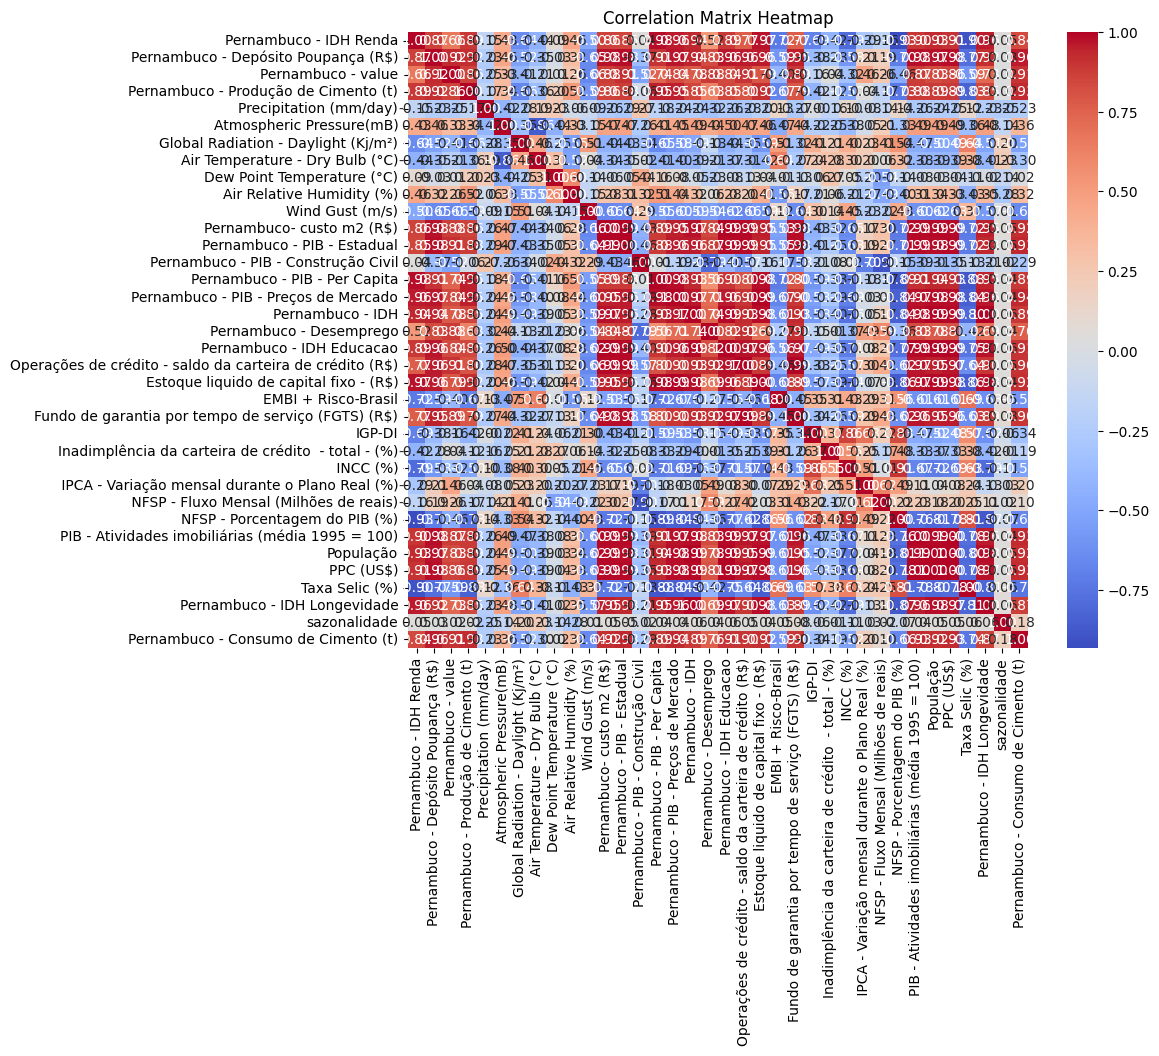

In [70]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

safe_data = data.iloc[:split_index + 1,1:-1]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def remove_high_vif_columns(dataframe, threshold=1000):
    i=0
    while True:
        vif_result = calculate_vif(dataframe)
        high_vif_column = vif_result.loc[vif_result["VIF"].idxmax()]["Feature"]
        
        if vif_result["VIF"].max() <= threshold:
            print(f"Num columns removed: {i}")
            return dataframe
        i += 1
        dataframe = dataframe.drop(high_vif_column, axis=1)

In [72]:
safe_data = data.iloc[:split_index + 1,1:-1]
vif_info = calculate_vif(safe_data)
vif_info

,Feature,VIF
0,Pernambuco - IDH Renda,3.659202e+10
1,Pernambuco - Depósito Poupança (R$),1.631230e+04
2,Pernambuco - value,3.997315e+03
3,Pernambuco - Produção de Cimento (t),7.345526e+03
4,Precipitation (mm/day),1.118993e+01
5,Atmospheric Pressure(mB),5.767504e+01
6,Global Radiation - Daylight (Kj/m²),2.532541e+01
7,Air Temperature - Dry Bulb (°C),8.322039e+01
8,Dew Point Temperature (°C),5.077219e+01
9,Air Relative Humidity (%),5.532793e+01


In [73]:
data =data.drop(['Precipitation (mm/day)', 
                 'Dew Point Temperature (°C)', 
                 ' NFSP - Fluxo Mensal (Milhões de reais)',
                 'PPC (US$)',
                 'População'], axis=1)
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,1012.239458,1768.569550,25.820814,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,11.520143,126.459809,1.611498,0.765509,157.912809,99.743
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,1012.240419,1767.661814,25.820777,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,11.189862,126.581813,1.450389,0.765971,137.690453,86.997
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,1012.240980,1767.132301,25.820756,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,10.820792,126.703818,1.870184,0.766434,161.728038,83.033
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,1012.241040,1767.075567,25.820754,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,10.417840,126.825822,1.355287,0.766896,146.370627,82.302
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,1012.120648,1783.069193,25.939427,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,9.959690,126.976217,1.585538,0.767358,151.940127,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.940127,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.800340,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.669227,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,161.820331,NaN


In [74]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-2.552946,-1.412756,-0.831441,-1.448613,-0.065458,0.631592,-0.190341,-0.443047,0.672395,-1.629640,-1.600582,-0.681942,-2.239908,-2.059430,-2.137529,-0.650048,-1.830465,-1.219223,-2.123742,-0.510608,-1.245444,3.807189,1.508986,3.557039,2.744724,4.007134,-1.745295,2.007617,-2.291849,0.067950
1,-2.495088,-1.404022,-0.779867,-1.455270,-0.064642,0.627878,-0.190383,-0.439570,0.672395,-1.601250,-1.579769,-0.639394,-2.195307,-2.021053,-2.097868,-0.652363,-1.803677,-1.218580,-2.088916,-0.710802,-1.285329,3.466444,1.502979,3.362807,2.328463,3.841816,-1.739636,1.464013,-2.245413,-1.626855
2,-2.437229,-1.395287,-0.730376,-1.441557,-0.064165,0.625712,-0.190407,-0.437542,0.672395,-1.574264,-1.558955,-0.596846,-2.150706,-1.982677,-2.058207,-0.654677,-1.776889,-1.218537,-2.054090,-0.544025,-1.300726,3.304873,1.501477,3.234624,2.074077,3.657082,-1.733978,2.880457,-2.198976,0.387699
3,-2.379371,-1.386553,-0.682612,-1.433852,-0.064114,0.625480,-0.190410,-0.437325,0.672395,-1.548271,-1.538141,-0.554298,-2.106105,-1.944301,-2.018546,-0.656992,-1.750101,-1.218044,-2.019264,-0.101360,-1.304485,3.047593,1.499141,3.111793,1.960720,3.455390,-1.728320,1.143128,-2.152540,-0.899383
4,-2.321513,-1.377818,-0.660585,-1.418896,-0.166343,0.690918,-0.054668,-0.508276,0.691642,-1.523739,-1.517327,-0.511750,-2.061504,-1.905924,-1.978885,-0.659307,-1.723312,-1.216487,-1.984438,0.484338,-1.295677,2.865728,1.487539,3.372081,1.810716,3.226068,-1.721344,1.920025,-2.106103,-0.432612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0.614379,1.005633,0.739082,0.031371,1.584791,0.835870,-0.614573,-1.024247,-0.763458,1.668726,1.486321,-2.194316,0.495951,0.893252,1.612851,1.816753,1.732497,1.823582,0.951535,0.414233,1.659621,-0.661498,-0.418507,-1.258759,0.318154,-0.538499,1.326731,0.209123,1.568361,0.395434
152,0.655564,0.972689,0.702472,-0.039055,1.342114,0.827982,-0.171813,-1.340850,-0.650074,1.697117,1.494710,-2.229238,0.487719,0.889442,1.699534,1.826061,1.795813,1.841017,0.944143,0.494098,1.654471,-0.630482,-0.159821,-1.388696,0.293838,-0.570093,1.329342,-0.182135,1.671580,0.769887
153,0.696750,0.939745,0.682980,-0.106826,0.932347,0.755571,0.195620,-1.341126,-0.663843,1.724809,1.503099,-2.264160,0.479486,0.885631,1.786216,1.835369,1.859129,1.860456,0.936751,0.584174,1.868895,-0.850517,0.107226,-1.390613,0.251845,-0.604269,1.331953,0.413308,1.774799,1.255116
154,0.737935,0.906801,0.673603,-0.167820,0.555603,0.803433,0.531412,-1.304888,-0.674189,1.754517,1.511489,-2.299082,0.471254,0.881821,1.872899,1.844677,1.922445,1.876950,0.929358,0.646687,2.106951,-1.018234,0.372672,-1.421626,0.100243,-0.636606,1.327515,0.074029,1.878019,1.269809


In [75]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-2.552946,-1.412756,-0.831441,-1.448613,-0.065458,0.631592,-0.190341,-0.443047,0.672395,-1.629640,-1.600582,-0.681942,-2.239908,-2.059430,-2.137529,-0.650048,-1.830465,-1.219223,-2.123742,-0.510608,-1.245444,3.807189,1.508986,3.557039,2.744724,4.007134,-1.745295,2.007617,-2.291849,0.067950
1,-2.495088,-1.404022,-0.779867,-1.455270,-0.064642,0.627878,-0.190383,-0.439570,0.672395,-1.601250,-1.579769,-0.639394,-2.195307,-2.021053,-2.097868,-0.652363,-1.803677,-1.218580,-2.088916,-0.710802,-1.285329,3.466444,1.502979,3.362807,2.328463,3.841816,-1.739636,1.464013,-2.245413,-1.626855
2,-2.437229,-1.395287,-0.730376,-1.441557,-0.064165,0.625712,-0.190407,-0.437542,0.672395,-1.574264,-1.558955,-0.596846,-2.150706,-1.982677,-2.058207,-0.654677,-1.776889,-1.218537,-2.054090,-0.544025,-1.300726,3.304873,1.501477,3.234624,2.074077,3.657082,-1.733978,2.880457,-2.198976,0.387699
3,-2.379371,-1.386553,-0.682612,-1.433852,-0.064114,0.625480,-0.190410,-0.437325,0.672395,-1.548271,-1.538141,-0.554298,-2.106105,-1.944301,-2.018546,-0.656992,-1.750101,-1.218044,-2.019264,-0.101360,-1.304485,3.047593,1.499141,3.111793,1.960720,3.455390,-1.728320,1.143128,-2.152540,-0.899383
4,-2.321513,-1.377818,-0.660585,-1.418896,-0.166343,0.690918,-0.054668,-0.508276,0.691642,-1.523739,-1.517327,-0.511750,-2.061504,-1.905924,-1.978885,-0.659307,-1.723312,-1.216487,-1.984438,0.484338,-1.295677,2.865728,1.487539,3.372081,1.810716,3.226068,-1.721344,1.920025,-2.106103,-0.432612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.556382,1.371059,1.400910,0.768867,1.563348,-0.226925,-1.119801,-0.054317,-0.812476,1.353481,1.376223,-1.669472,0.679149,0.988624,1.008420,1.641808,1.228240,1.517172,1.018624,-0.364905,1.409149,0.519146,-0.961354,-0.690123,1.744343,-0.357756,1.345611,-0.282621,0.853102,0.395434
140,0.510322,1.344096,1.358893,0.715101,1.229508,0.292252,-0.741514,-0.072355,-0.945301,1.376834,1.386497,-1.725550,0.654035,0.974884,1.007951,1.663766,1.240449,1.549848,1.015555,-0.347187,1.422197,0.540645,-1.047598,-0.646253,1.739673,-0.353467,1.346023,-0.612121,0.851647,0.769887
141,0.464262,1.317132,1.308516,0.660141,0.958127,0.663023,-0.372538,-0.220674,-0.980789,1.400469,1.396772,-1.781628,0.628921,0.961144,1.007482,1.685723,1.252658,1.588878,1.012487,-0.321619,1.608476,0.589758,-1.189483,-0.641003,1.698689,-0.355172,1.346436,-0.137902,0.850192,1.255116
142,0.418202,1.290169,1.252205,0.604209,0.597190,0.989488,0.106572,-0.555851,-1.091420,1.427171,1.407046,-1.837706,0.603806,0.947404,1.007013,1.707681,1.264866,1.625721,1.009418,-0.287493,1.830253,0.536404,-1.332682,-0.650191,1.675167,-0.359681,1.337260,-0.332143,0.848737,1.269809


In [76]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       84.896000
1       81.240000
2      100.925000
3       83.152000
4       81.128000
          ...    
139    174.377310
140    176.998609
141    184.299560
142    180.505743
143    173.864500
Name: Pernambuco - Consumo de Cimento (t), Length: 144, dtype: float64

In [77]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [78]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(108, 36, 30)

In [79]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
108,0.885115,0.765537,0.922692,1.385775,-0.537731,-0.428252,0.238594,1.550851,-0.282242,0.694286,0.820147,0.428418,1.146609,1.061580,0.663657,0.848330,0.640199,0.595959,0.890825,-0.758140,0.735654,-0.150121,1.452528,-0.134638,-0.348558,-0.712725,0.693264,-1.082183,0.728428,0.067950
109,0.896511,0.802346,0.989394,1.402407,-0.418543,-0.440617,0.221133,1.071779,-0.346219,0.710561,0.843302,0.363044,1.137261,1.067791,0.683691,0.877939,0.665181,0.621380,0.900214,-0.744935,0.632719,-0.064049,1.577437,-0.250541,-0.314756,-0.707406,0.732176,-1.036767,0.736502,-1.626855
110,0.907908,0.839154,1.062014,1.421385,-0.021728,-0.655215,-0.056361,1.042469,-0.514009,0.727030,0.866457,0.297669,1.127913,1.074002,0.703725,0.907547,0.690164,0.652999,0.909602,-0.743509,0.633437,0.165323,1.665230,-0.253852,-0.193331,-0.699231,0.771088,-0.752482,0.744575,0.387699
111,0.919305,0.875963,1.126724,1.411457,0.442615,-0.941123,-0.544684,1.114683,-0.647500,0.744468,0.889611,0.232294,1.118565,1.080213,0.723759,0.937155,0.715146,0.685630,0.918990,-0.748471,0.610450,0.155491,1.735648,-0.175858,-0.069191,-0.693507,0.810000,-1.088413,0.752649,-0.899383
112,0.930701,0.912771,1.169412,1.399774,1.167545,-1.145754,-1.082927,1.177630,-0.674945,0.761978,0.912766,0.166920,1.109218,1.086423,0.743793,0.966763,0.740128,0.717515,0.928378,-0.764308,0.631167,-0.075593,1.739412,0.099226,-0.104407,-0.679000,0.850727,-1.508135,0.760722,-0.432612
113,0.942098,0.949580,1.205694,1.394779,1.734746,-1.135690,-1.402219,1.049745,-0.603111,0.779561,0.935920,0.101545,1.099870,1.092634,0.763827,0.996372,0.765111,0.747579,0.937766,-0.786416,0.659533,-0.323610,1.747279,-0.153882,-0.083975,-0.662783,0.891455,-1.474280,0.768796,-1.785263
114,0.953495,0.986388,1.241780,1.414382,1.845666,-0.985192,-1.414814,0.724470,-0.417700,0.797188,0.959075,0.036171,1.090522,1.098845,0.783861,1.025980,0.790093,0.775262,0.947155,-0.808518,0.667761,-0.525659,1.756575,-0.146871,-0.089130,-0.650682,0.932183,-1.463452,0.776869,-0.371507
115,0.964892,1.023197,1.277949,1.425885,1.621450,-0.795834,-1.126878,0.336998,-0.311594,0.815716,0.982230,-0.029204,1.081174,1.105056,0.803895,1.055588,0.815076,0.805205,0.956543,-0.838953,0.689072,-0.771574,1.787886,-0.265940,-0.124447,-0.648019,0.969967,-1.236037,0.784943,0.395434
116,0.976288,1.060005,1.314109,1.430603,1.046108,-0.582955,-0.558428,-0.111368,-0.193233,0.835090,1.005384,-0.094579,1.071826,1.111266,0.823929,1.085196,0.840058,0.836796,0.965931,-0.869366,0.684945,-0.995926,1.740250,-0.285762,-0.077195,-0.640313,1.007752,-0.935721,0.793016,0.769887
117,0.987685,1.096814,1.347389,1.423317,0.447020,-0.436292,-0.089938,-0.297855,-0.191387,0.854258,1.028539,-0.159953,1.062478,1.117477,0.843963,1.114804,0.865040,0.876422,0.975319,-0.900682,0.852584,-1.066619,1.618503,-0.293773,-0.110139,-0.639749,1.045536,-1.241995,0.801090,1.255116


In [80]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 30)

In [81]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [82]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.1,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [83]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [84]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[2951118399, 1762021283, 693251378, 3632743759, 385450147, 808073465, 1147014005, 1817119078, 649978696, 126697918]


Step: 0 ___________________________________________
val_loss: 220.68406677246094
winner_seed: 2951118399


Step: 1 ___________________________________________
val_loss: 317.65020751953125


Step: 2 ___________________________________________
val_loss: 218.04188537597656
winner_seed: 693251378


Step: 3 ___________________________________________
val_loss: 242.45883178710938


Step: 4 ___________________________________________
val_loss: 980.252685546875


Step: 5 ___________________________________________
val_loss: 1360.209716796875


Step: 6 ___________________________________________
val_loss: 620.563720703125


Step: 7 ___________________________________________
val_loss: 386.3846435546875


Step: 8 ___________________________________________
val_loss: 205.29019165039062
winner_seed: 649978696


Step: 9 ___________________________________________
val_loss: 705.68231

In [85]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 1012299702

Epoch 1/10000
4/4 [==============================] - 2s 127ms/step - loss: 39782.0000 - val_loss: 2435.7539
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 5447.5107 - val_loss: 1509.1313
Epoch 3/10000
4/4 [==============================] - 0s 10ms/step - loss: 1676.1366 - val_loss: 1449.4603
Epoch 4/10000
4/4 [==============================] - 0s 11ms/step - loss: 1675.7378 - val_loss: 2150.3828
Epoch 5/10000
4/4 [==============================] - 0s 10ms/step - loss: 1682.3552 - val_loss: 3365.5125
Epoch 6/10000
4/4 [==============================] - 0s 11ms/step - loss: 1709.7058 - val_loss: 2692.3669
Epoch 7/10000
4/4 [==============================] - 0s 10ms/step - loss: 1891.2242 - val_loss: 2095.0107
Epoch 8/10000
4/4 [==============================] - 0s 9ms/step - loss: 1631.5389 - val_loss: 3418.2354
Epoch 9/10000
4/4 [==============================] - 0s 10ms/step - loss: 1538.1395 - val_loss: 4154.1211
Epoch 10/10000
4/4 [=========================

4/4 [==============================] - 0s 10ms/step - loss: 499.3804 - val_loss: 884.8084
Epoch 79/10000
4/4 [==============================] - 0s 10ms/step - loss: 468.5652 - val_loss: 1121.8610
Epoch 80/10000
4/4 [==============================] - 0s 10ms/step - loss: 439.2541 - val_loss: 1514.4220
Epoch 81/10000
4/4 [==============================] - 0s 11ms/step - loss: 671.2526 - val_loss: 1166.2375
Epoch 82/10000
4/4 [==============================] - 0s 11ms/step - loss: 578.4196 - val_loss: 1478.4900
Epoch 83/10000
4/4 [==============================] - 0s 10ms/step - loss: 556.1416 - val_loss: 1317.3793
Epoch 84/10000
4/4 [==============================] - 0s 10ms/step - loss: 513.6241 - val_loss: 923.6685
Epoch 85/10000
4/4 [==============================] - 0s 10ms/step - loss: 573.2508 - val_loss: 1427.5717
Epoch 86/10000
4/4 [==============================] - 0s 10ms/step - loss: 446.8380 - val_loss: 1967.9117
Epoch 87/10000
4/4 [==============================] - 0s 9ms/st

4/4 [==============================] - 0s 11ms/step - loss: 341.9606 - val_loss: 422.2240
Epoch 156/10000
4/4 [==============================] - 0s 10ms/step - loss: 310.8478 - val_loss: 421.8658
Epoch 157/10000
4/4 [==============================] - 0s 11ms/step - loss: 281.7483 - val_loss: 610.6804
Epoch 158/10000
4/4 [==============================] - 0s 11ms/step - loss: 314.4201 - val_loss: 285.8282
Epoch 159/10000
4/4 [==============================] - 0s 10ms/step - loss: 355.4687 - val_loss: 1353.1740
Epoch 160/10000
4/4 [==============================] - 0s 9ms/step - loss: 461.6298 - val_loss: 689.9811
Epoch 161/10000
4/4 [==============================] - 0s 10ms/step - loss: 385.9285 - val_loss: 332.8643
Epoch 162/10000
4/4 [==============================] - 0s 9ms/step - loss: 344.3269 - val_loss: 332.1300
Epoch 163/10000
4/4 [==============================] - 0s 11ms/step - loss: 401.4133 - val_loss: 660.9548
Epoch 164/10000
4/4 [==============================] - 0s 10ms/

4/4 [==============================] - 0s 11ms/step - loss: 358.3086 - val_loss: 1259.4041
Epoch 233/10000
4/4 [==============================] - 0s 11ms/step - loss: 332.3208 - val_loss: 1725.3732
Epoch 234/10000
4/4 [==============================] - 0s 10ms/step - loss: 435.3251 - val_loss: 1433.2303
Epoch 235/10000
4/4 [==============================] - 0s 10ms/step - loss: 404.8645 - val_loss: 1246.5680
Epoch 236/10000
4/4 [==============================] - 0s 10ms/step - loss: 409.3997 - val_loss: 1008.0093
Epoch 237/10000
4/4 [==============================] - 0s 10ms/step - loss: 408.2524 - val_loss: 1092.6492
Epoch 238/10000
4/4 [==============================] - 0s 10ms/step - loss: 337.6430 - val_loss: 708.5395
Epoch 239/10000
4/4 [==============================] - 0s 10ms/step - loss: 390.7466 - val_loss: 1495.0515
Epoch 240/10000
4/4 [==============================] - 0s 10ms/step - loss: 401.2369 - val_loss: 889.6541
Epoch 241/10000
4/4 [==============================] - 

4/4 [==============================] - 0s 10ms/step - loss: 442.4769 - val_loss: 2255.7500
Epoch 310/10000
4/4 [==============================] - 0s 10ms/step - loss: 505.8314 - val_loss: 1854.3141
Epoch 311/10000
4/4 [==============================] - 0s 11ms/step - loss: 455.2117 - val_loss: 1461.4419
Epoch 312/10000
4/4 [==============================] - 0s 10ms/step - loss: 413.2347 - val_loss: 1754.4508
Epoch 313/10000
4/4 [==============================] - 0s 10ms/step - loss: 433.0015 - val_loss: 1484.5011
Epoch 314/10000
4/4 [==============================] - 0s 10ms/step - loss: 411.5457 - val_loss: 1380.4543
Epoch 315/10000
4/4 [==============================] - 0s 11ms/step - loss: 456.9303 - val_loss: 1836.8801
Epoch 316/10000
4/4 [==============================] - 0s 10ms/step - loss: 425.1767 - val_loss: 1159.5078
Epoch 317/10000
4/4 [==============================] - 0s 10ms/step - loss: 498.8600 - val_loss: 1492.8599
Epoch 318/10000
4/4 [==============================] 

Epoch 386/10000
4/4 [==============================] - 0s 12ms/step - loss: 556.6641 - val_loss: 4184.1670
Epoch 387/10000
4/4 [==============================] - 0s 12ms/step - loss: 558.7736 - val_loss: 5317.3784
Epoch 388/10000
4/4 [==============================] - 0s 12ms/step - loss: 663.5096 - val_loss: 4873.7139
Epoch 389/10000
4/4 [==============================] - 0s 10ms/step - loss: 635.4290 - val_loss: 3800.2803
Epoch 390/10000
4/4 [==============================] - 0s 10ms/step - loss: 579.7818 - val_loss: 3755.9041
Epoch 391/10000
4/4 [==============================] - 0s 10ms/step - loss: 592.2257 - val_loss: 4262.2808
Epoch 392/10000
4/4 [==============================] - 0s 10ms/step - loss: 681.1319 - val_loss: 4476.8130
Epoch 393/10000
4/4 [==============================] - 0s 10ms/step - loss: 576.0815 - val_loss: 4559.3794
Epoch 394/10000
4/4 [==============================] - 0s 10ms/step - loss: 597.2583 - val_loss: 4298.6074
Epoch 395/10000
4/4 [================

4/4 [==============================] - 0s 10ms/step - loss: 546.0408 - val_loss: 2611.5029
Epoch 463/10000
4/4 [==============================] - 0s 11ms/step - loss: 556.7477 - val_loss: 2278.0125
Epoch 464/10000
4/4 [==============================] - 0s 10ms/step - loss: 589.5270 - val_loss: 2032.0055
Epoch 465/10000
4/4 [==============================] - 0s 10ms/step - loss: 918.2169 - val_loss: 925.1524
Epoch 466/10000
4/4 [==============================] - 0s 10ms/step - loss: 885.2243 - val_loss: 2687.3860
Epoch 467/10000
4/4 [==============================] - 0s 9ms/step - loss: 537.9139 - val_loss: 4571.8569
Epoch 468/10000
4/4 [==============================] - 0s 10ms/step - loss: 546.5769 - val_loss: 3826.6289
Epoch 469/10000
4/4 [==============================] - 0s 10ms/step - loss: 601.0153 - val_loss: 1297.9529
Epoch 470/10000
4/4 [==============================] - 0s 10ms/step - loss: 798.5193 - val_loss: 3111.8362
Epoch 471/10000
4/4 [==============================] - 

Epoch 539/10000
4/4 [==============================] - 0s 10ms/step - loss: 394.9575 - val_loss: 1506.8132
Epoch 540/10000
4/4 [==============================] - 0s 10ms/step - loss: 402.7257 - val_loss: 1990.6851
Epoch 541/10000
4/4 [==============================] - 0s 10ms/step - loss: 446.8487 - val_loss: 1503.7407
Epoch 542/10000
4/4 [==============================] - 0s 10ms/step - loss: 383.0132 - val_loss: 1454.7670
Epoch 543/10000
4/4 [==============================] - 0s 10ms/step - loss: 397.6954 - val_loss: 1541.4022
Epoch 544/10000
4/4 [==============================] - 0s 10ms/step - loss: 374.8154 - val_loss: 1779.5786
Epoch 545/10000
4/4 [==============================] - 0s 10ms/step - loss: 388.3810 - val_loss: 1573.9933
Epoch 546/10000
4/4 [==============================] - 0s 11ms/step - loss: 385.7639 - val_loss: 911.1187
Epoch 547/10000
4/4 [==============================] - 0s 10ms/step - loss: 420.2766 - val_loss: 1501.1958
Epoch 548/10000
4/4 [=================

4/4 [==============================] - 0s 10ms/step - loss: 401.8760 - val_loss: 1283.6522
Epoch 616/10000
4/4 [==============================] - 0s 10ms/step - loss: 350.3561 - val_loss: 1692.0878
Epoch 617/10000
4/4 [==============================] - 0s 10ms/step - loss: 417.9670 - val_loss: 1462.2306
Epoch 618/10000
4/4 [==============================] - 0s 11ms/step - loss: 347.8701 - val_loss: 988.4990
Epoch 619/10000
4/4 [==============================] - 0s 10ms/step - loss: 387.1826 - val_loss: 1115.4069
Epoch 620/10000
4/4 [==============================] - 0s 10ms/step - loss: 402.6397 - val_loss: 1456.8385
Epoch 621/10000
4/4 [==============================] - 0s 10ms/step - loss: 495.4668 - val_loss: 1744.5073
Epoch 622/10000
4/4 [==============================] - 0s 11ms/step - loss: 468.3562 - val_loss: 1334.4520
Epoch 623/10000
4/4 [==============================] - 0s 10ms/step - loss: 412.2025 - val_loss: 1268.2129
Epoch 624/10000
4/4 [==============================] -

Epoch 692/10000
4/4 [==============================] - 0s 10ms/step - loss: 395.5104 - val_loss: 1514.7789
Epoch 693/10000
4/4 [==============================] - 0s 11ms/step - loss: 410.3464 - val_loss: 1319.1150
Epoch 694/10000
4/4 [==============================] - 0s 10ms/step - loss: 366.9975 - val_loss: 1307.3243
Epoch 695/10000
4/4 [==============================] - 0s 10ms/step - loss: 356.7777 - val_loss: 1445.6349
Epoch 696/10000
4/4 [==============================] - 0s 10ms/step - loss: 372.4316 - val_loss: 1224.0281
Epoch 697/10000
4/4 [==============================] - 0s 10ms/step - loss: 370.2103 - val_loss: 1108.6951
Epoch 698/10000
4/4 [==============================] - 0s 9ms/step - loss: 378.7804 - val_loss: 1279.8179
Epoch 699/10000
4/4 [==============================] - 0s 10ms/step - loss: 373.8378 - val_loss: 1166.7333
Epoch 700/10000
4/4 [==============================] - 0s 10ms/step - loss: 378.0411 - val_loss: 1195.3347
Epoch 701/10000
4/4 [=================

4/4 [==============================] - 0s 11ms/step - loss: 390.2109 - val_loss: 782.6038
Epoch 769/10000
4/4 [==============================] - 0s 11ms/step - loss: 375.5869 - val_loss: 982.7872
Epoch 770/10000
4/4 [==============================] - 0s 11ms/step - loss: 437.6248 - val_loss: 976.6797
Epoch 771/10000
4/4 [==============================] - 0s 11ms/step - loss: 394.5020 - val_loss: 798.8399
Epoch 772/10000
4/4 [==============================] - 0s 10ms/step - loss: 361.0624 - val_loss: 908.9135
Epoch 773/10000
4/4 [==============================] - 0s 11ms/step - loss: 369.3575 - val_loss: 923.6077
Epoch 774/10000
4/4 [==============================] - 0s 10ms/step - loss: 358.4190 - val_loss: 1118.6788
Epoch 775/10000
4/4 [==============================] - 0s 11ms/step - loss: 370.1892 - val_loss: 1056.7865
Epoch 776/10000
4/4 [==============================] - 0s 10ms/step - loss: 315.9526 - val_loss: 1389.0135
Epoch 777/10000
4/4 [==============================] - 0s 1

Epoch 845/10000
4/4 [==============================] - 0s 10ms/step - loss: 347.8252 - val_loss: 1281.1266
Epoch 846/10000
4/4 [==============================] - 0s 9ms/step - loss: 309.7583 - val_loss: 1364.7526
Epoch 847/10000
4/4 [==============================] - 0s 10ms/step - loss: 334.4658 - val_loss: 1361.9894
Epoch 848/10000
4/4 [==============================] - 0s 10ms/step - loss: 303.5019 - val_loss: 1138.5001
Epoch 849/10000
4/4 [==============================] - 0s 10ms/step - loss: 300.6228 - val_loss: 906.8602
Epoch 850/10000
4/4 [==============================] - 0s 10ms/step - loss: 297.4430 - val_loss: 990.1309
Epoch 851/10000
4/4 [==============================] - 0s 10ms/step - loss: 290.3747 - val_loss: 939.9443
Epoch 852/10000
4/4 [==============================] - 0s 10ms/step - loss: 344.8882 - val_loss: 1000.0069
Epoch 853/10000
4/4 [==============================] - 0s 9ms/step - loss: 334.6993 - val_loss: 1081.1727
Epoch 854/10000
4/4 [=====================

Epoch 922/10000
4/4 [==============================] - 0s 10ms/step - loss: 328.3446 - val_loss: 1579.8676
Epoch 923/10000
4/4 [==============================] - 0s 10ms/step - loss: 315.2056 - val_loss: 1375.0364
Epoch 924/10000
4/4 [==============================] - 0s 9ms/step - loss: 301.7763 - val_loss: 1086.7545
Epoch 925/10000
4/4 [==============================] - 0s 10ms/step - loss: 294.8716 - val_loss: 1182.7585
Epoch 926/10000
4/4 [==============================] - 0s 11ms/step - loss: 280.4265 - val_loss: 1058.7184
Epoch 927/10000
4/4 [==============================] - 0s 10ms/step - loss: 288.3749 - val_loss: 1624.2524
Epoch 928/10000
4/4 [==============================] - 0s 10ms/step - loss: 329.2077 - val_loss: 1105.8143
Epoch 929/10000
4/4 [==============================] - 0s 10ms/step - loss: 304.3852 - val_loss: 1283.3428
Epoch 930/10000
4/4 [==============================] - 0s 10ms/step - loss: 299.2533 - val_loss: 1170.3076
Epoch 931/10000
4/4 [=================

4/4 [==============================] - 0s 10ms/step - loss: 333.0713 - val_loss: 1051.7830
Epoch 999/10000
4/4 [==============================] - 0s 10ms/step - loss: 526.6102 - val_loss: 1155.6564
Epoch 1000/10000
4/4 [==============================] - 0s 11ms/step - loss: 372.4481 - val_loss: 1151.5992
Epoch 1001/10000
4/4 [==============================] - 0s 10ms/step - loss: 376.2631 - val_loss: 1237.7814
Epoch 1002/10000
4/4 [==============================] - 0s 11ms/step - loss: 395.2007 - val_loss: 731.8053
Epoch 1003/10000
4/4 [==============================] - 0s 10ms/step - loss: 633.4611 - val_loss: 1862.5930
Epoch 1004/10000
4/4 [==============================] - 0s 11ms/step - loss: 490.2673 - val_loss: 1613.9735
Epoch 1005/10000
4/4 [==============================] - 0s 11ms/step - loss: 391.0024 - val_loss: 1567.1655
Epoch 1006/10000
4/4 [==============================] - 0s 10ms/step - loss: 382.9704 - val_loss: 1942.1910
Epoch 1007/10000
4/4 [=========================

4/4 [==============================] - 0s 12ms/step - loss: 367.2981 - val_loss: 1032.6638
Epoch 1075/10000
4/4 [==============================] - 0s 11ms/step - loss: 330.2409 - val_loss: 998.9719
Epoch 1076/10000
4/4 [==============================] - 0s 10ms/step - loss: 378.2967 - val_loss: 1018.6766
Epoch 1077/10000
4/4 [==============================] - 0s 11ms/step - loss: 345.2434 - val_loss: 1168.8286
Epoch 1078/10000
4/4 [==============================] - 0s 10ms/step - loss: 329.5557 - val_loss: 1193.0176
Epoch 1079/10000
4/4 [==============================] - 0s 10ms/step - loss: 336.6676 - val_loss: 1180.2744
Epoch 1080/10000
4/4 [==============================] - 0s 10ms/step - loss: 320.4520 - val_loss: 1427.1183
Epoch 1081/10000
4/4 [==============================] - 0s 10ms/step - loss: 312.9937 - val_loss: 1148.6465
Epoch 1082/10000
4/4 [==============================] - 0s 10ms/step - loss: 332.9701 - val_loss: 1099.3854
Epoch 1083/10000
4/4 [========================

4/4 [==============================] - 0s 11ms/step - loss: 705.7781 - val_loss: 3574.6208
Epoch 1151/10000
4/4 [==============================] - 0s 10ms/step - loss: 609.7610 - val_loss: 3466.2725
Epoch 1152/10000
4/4 [==============================] - 0s 10ms/step - loss: 592.3788 - val_loss: 3141.8611
Epoch 1153/10000
4/4 [==============================] - 0s 9ms/step - loss: 585.1933 - val_loss: 3057.5820
Epoch 1154/10000
4/4 [==============================] - 0s 9ms/step - loss: 606.6175 - val_loss: 3272.3096
Epoch 1155/10000
4/4 [==============================] - 0s 10ms/step - loss: 608.5172 - val_loss: 2893.7400
Epoch 1156/10000
4/4 [==============================] - 0s 9ms/step - loss: 914.6433 - val_loss: 3607.7134
Epoch 1157/10000
4/4 [==============================] - 0s 11ms/step - loss: 555.2498 - val_loss: 3139.4412
Epoch 1158/10000
4/4 [==============================] - 0s 10ms/step - loss: 680.4423 - val_loss: 2813.6963
Epoch 1159/10000
4/4 [==========================

4/4 [==============================] - 0s 10ms/step - loss: 499.6710 - val_loss: 3614.1914
Epoch 1227/10000
4/4 [==============================] - 0s 10ms/step - loss: 521.8133 - val_loss: 4170.8457
Epoch 1228/10000
4/4 [==============================] - 0s 10ms/step - loss: 493.7886 - val_loss: 852.3193
Epoch 1229/10000
4/4 [==============================] - 0s 11ms/step - loss: 692.0288 - val_loss: 944.1208
Epoch 1230/10000
4/4 [==============================] - 0s 11ms/step - loss: 562.9711 - val_loss: 3119.4690
Epoch 1231/10000
4/4 [==============================] - 0s 10ms/step - loss: 456.8105 - val_loss: 3451.1135
Epoch 1232/10000
4/4 [==============================] - 0s 10ms/step - loss: 504.1133 - val_loss: 2548.4702
Epoch 1233/10000
4/4 [==============================] - 0s 11ms/step - loss: 461.4158 - val_loss: 2611.0337
Epoch 1234/10000
4/4 [==============================] - 0s 11ms/step - loss: 430.4921 - val_loss: 2834.7744
Epoch 1235/10000
4/4 [=========================

4/4 [==============================] - 0s 11ms/step - loss: 403.6718 - val_loss: 2369.7429
Epoch 1303/10000
4/4 [==============================] - 0s 9ms/step - loss: 444.8143 - val_loss: 1871.8270
Epoch 1304/10000
4/4 [==============================] - 0s 10ms/step - loss: 387.8862 - val_loss: 1552.7827
Epoch 1305/10000
4/4 [==============================] - 0s 10ms/step - loss: 392.4799 - val_loss: 1668.7225
Epoch 1306/10000
4/4 [==============================] - 0s 9ms/step - loss: 613.8870 - val_loss: 1467.8942
Epoch 1307/10000
4/4 [==============================] - 0s 9ms/step - loss: 524.8574 - val_loss: 1264.8528
Epoch 1308/10000
4/4 [==============================] - 0s 10ms/step - loss: 411.0769 - val_loss: 939.9043
Epoch 1309/10000
4/4 [==============================] - 0s 11ms/step - loss: 605.3367 - val_loss: 2457.6760
Epoch 1310/10000
4/4 [==============================] - 0s 11ms/step - loss: 456.7612 - val_loss: 1262.2620
Epoch 1311/10000
4/4 [===========================

4/4 [==============================] - 0s 11ms/step - loss: 562.6251 - val_loss: 2958.6150
Epoch 1379/10000
4/4 [==============================] - 0s 10ms/step - loss: 484.7633 - val_loss: 3199.7290
Epoch 1380/10000
4/4 [==============================] - 0s 10ms/step - loss: 504.9449 - val_loss: 2972.1643
Epoch 1381/10000
4/4 [==============================] - 0s 10ms/step - loss: 527.8796 - val_loss: 1765.6356
Epoch 1382/10000
4/4 [==============================] - 0s 10ms/step - loss: 458.2903 - val_loss: 2355.7427
Epoch 1383/10000
4/4 [==============================] - 0s 10ms/step - loss: 483.3084 - val_loss: 1177.0969
Epoch 1384/10000
4/4 [==============================] - 0s 10ms/step - loss: 775.8158 - val_loss: 1884.4575
Epoch 1385/10000
4/4 [==============================] - 0s 11ms/step - loss: 535.2717 - val_loss: 1986.7941
Epoch 1386/10000
4/4 [==============================] - 0s 11ms/step - loss: 607.2439 - val_loss: 991.0457
Epoch 1387/10000
4/4 [========================

4/4 [==============================] - 0s 10ms/step - loss: 578.6638 - val_loss: 2633.6924
Epoch 1455/10000
4/4 [==============================] - 0s 13ms/step - loss: 590.4821 - val_loss: 941.5984
Epoch 1455: early stopping


In [86]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [87]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,173.188843,172.899292,172.677795,172.476898,172.601776,172.662933,172.822388,171.232758,171.386612,171.098007,171.997879,172.573532
Target,177.729,143.388,188.227,143.049,148.068,133.872,131.464,151.37,154.276,153.331,152.6,136.567
Error,4.540161,29.511292,15.54921,29.427902,24.533783,38.790939,41.358383,19.862762,17.110611,17.767014,19.397873,36.006531


In [88]:
display(mae)
display(mape)

24.488037

0.1698761

In [89]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [90]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 15ms/step
Ano-11: |Prediction[[2067.619]] - Target[1813.9409999999998]| =  Error: [[253.67786]]; MAPE:[[0.139849]]


[array([[253.67786]], dtype=float32)]

253.67786

0.139849